In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from plotly import offline
from plotly import graph_objs as go

In [75]:
df = pd.read_csv(r'../Datasets/Airlines.csv')
df.head(2)

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1


In [76]:
df.isnull()   # data da null olan datalari getirir varsa true yoxdursa false verir

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
539378,False,False,False,False,False,False,False,False,False
539379,False,False,False,False,False,False,False,False,False
539380,False,False,False,False,False,False,False,False,False
539381,False,False,False,False,False,False,False,False,False


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [78]:
df['Airline'].fillna(df['Airline'].mode()[0], inplace=True)

In [79]:
df['Airline'].value_counts()

Airline
WN    94097
DL    60940
OO    50254
AA    45656
MQ    36605
US    34500
XE    31126
EV    27983
UA    27619
CO    21118
FL    20827
9E    20686
B6    18112
YV    13725
OH    12630
AS    11471
F9     6456
HA     5578
Name: count, dtype: int64

In [80]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [81]:
df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.00000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.00000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.60446,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.00000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.50000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.00000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.50000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.00000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [82]:
df.isnull().sum()


id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [83]:
df.duplicated().sum()


0

In [84]:
dist_airlines = df['Airline'].unique()
dist_airlines

array(['CO', 'US', 'AA', 'AS', 'DL', 'B6', 'HA', 'OO', '9E', 'OH', 'EV',
       'XE', 'YV', 'UA', 'MQ', 'FL', 'F9', 'WN'], dtype=object)

In [85]:
different_airline=df["Airline"].unique()
num_of_different_airline=df["Airline"].nunique()
print("Different airline name: ",str(different_airline))
print("Total number of airlines are: ",num_of_different_airline)

Different airline name:  ['CO' 'US' 'AA' 'AS' 'DL' 'B6' 'HA' 'OO' '9E' 'OH' 'EV' 'XE' 'YV' 'UA'
 'MQ' 'FL' 'F9' 'WN']
Total number of airlines are:  18


In [86]:
airline=df["Airline"].value_counts()
airline=pd.DataFrame(airline).reset_index()
airline

,Airline,count
0,WN,94097
1,DL,60940
2,OO,50254
3,AA,45656
4,MQ,36605
5,US,34500
6,XE,31126
7,EV,27983
8,UA,27619
9,CO,21118


<Axes: xlabel='Airline', ylabel='Delay'>

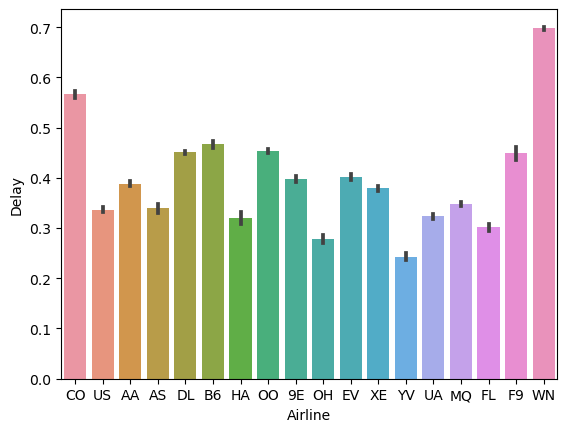

In [87]:
sb.barplot(x= df['Airline'], y = df['Delay'])


c:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



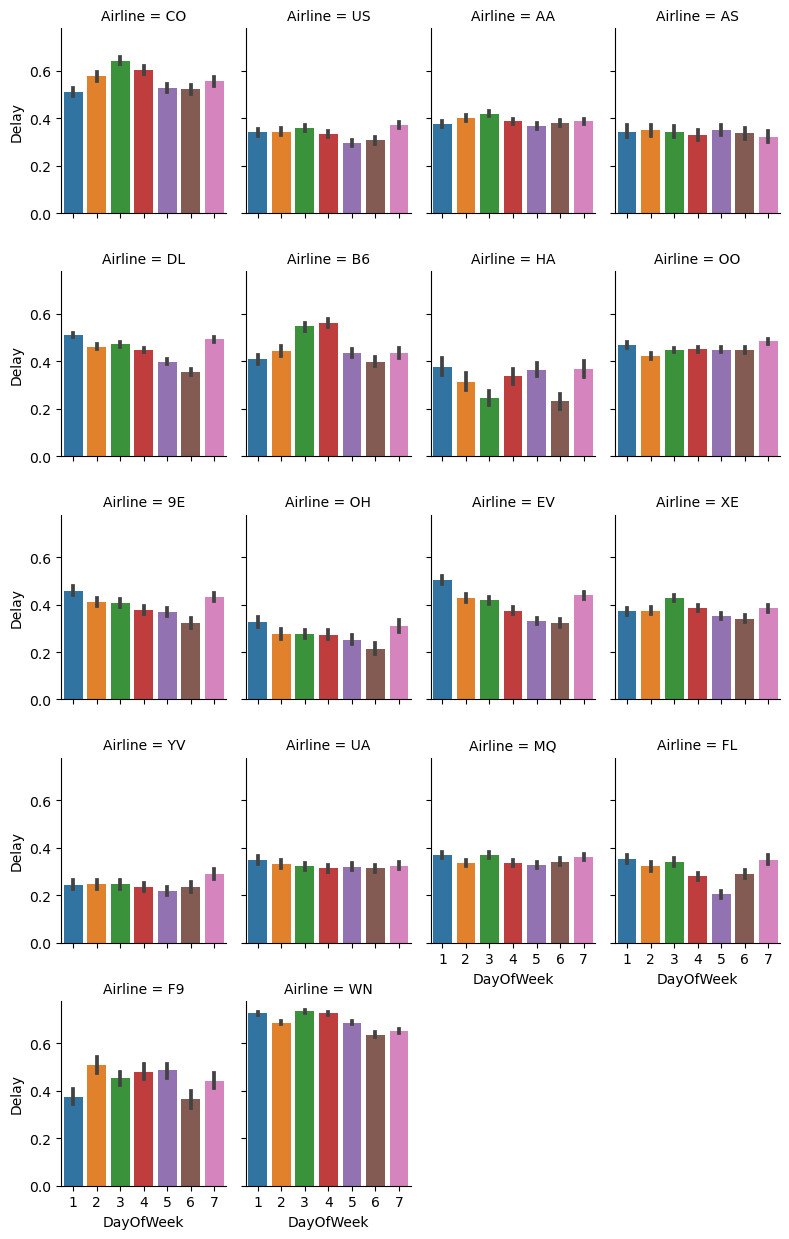

In [88]:
sb.catplot(data=df[df.notnull()], x='DayOfWeek',y='Delay',col_wrap = 4,
           col= 'Airline', kind="bar", height = 2.5, aspect=.8)

<Axes: xlabel='Airline', ylabel='Length'>

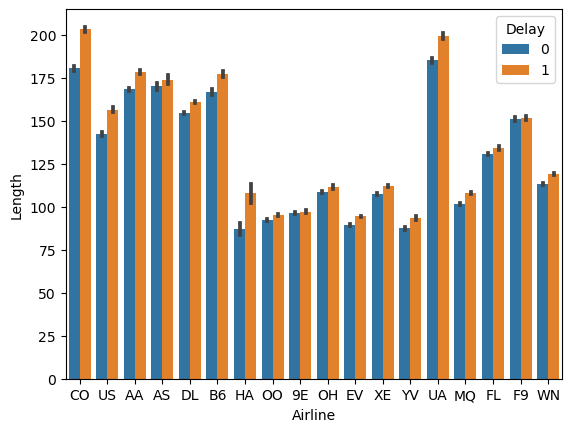

In [89]:
sb.barplot(x = df['Airline'], y = df['Length'], hue=df['Delay']) 